In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read data into memory
data_set = np.genfromtxt("hw05_data_set.csv", delimiter = ",")

# I separate 150 data as training set and remaining 122 data as testing set.
train = np.array(data_set[1:151])
x_train = np.array([p[0] for p in train])
y_train = np.array([p[1] for p in train])

test = np.array(data_set[151:273])
x_test = np.array([p[0] for p in test])
y_test = np.array([p[1] for p in test])


In [3]:
def tree(x_train,y_train,P):
    # generates the necessary data.
    node_indices = {}
    is_terminal = {}
    need_split = {}
    node_means = {}
    node_splits = {}

    # put all training instances into the root node
    node_indices[1] = np.array(range(len(x_train)))
    is_terminal[1] = False
    need_split[1] = True
    
    while 1:
        
        # Identifying nodes to be splitting
        split_nodes = [key for key, value in need_split.items() if value == True]
        if len(split_nodes) == 0:
            break
            
        # Finding the optimal split location for all nodes
        for split_node in split_nodes:
            data_indices = node_indices[split_node]
            need_split[split_node] = False
            node_mean = np.mean(y_train[data_indices])
            
            #Pruning
            if x_train[data_indices].size <=P:
                is_terminal[split_node] = True
                node_means[split_node] = node_mean
                
            else:
                is_terminal[split_node] = False
                x_sorted = np.sort(np.unique(x_train[data_indices]))
                split_positions = (x_sorted[1:len(x_sorted)] +x_sorted[0:(len(x_sorted)-1)])/2
                split_scores = np.repeat(0.0,len(split_positions))
                
                for s in range(len(split_positions)):
                    left_indices = data_indices[x_train[data_indices] < split_positions[s]]
                    right_indices = data_indices[x_train[data_indices] >= split_positions[s]]
                    total_err = 0
                    if len(left_indices)>0:
                        total_err += np.sum((y_train[left_indices] - np.mean(y_train[left_indices])) ** 2)
                    if len(right_indices)>0:
                        total_err += np.sum((y_train[right_indices] - np.mean(y_train[right_indices])) ** 2)
                    split_scores[s] = total_err/(len(left_indices)+len(right_indices))
                    
                # len 1 situation
                if len(x_sorted) == 1 :
                    is_terminal[split_node] = True
                    node_means[split_node] = node_mean
                    continue
                best_split = split_positions[np.argmin(split_scores)]
                node_splits[split_node] = best_split
                
                # create left node after selected split
                left_indices = data_indices[(x_train[data_indices] < best_split)]
                node_indices[2 * split_node] =left_indices
                is_terminal[2 * split_node]  = False
                need_split[2 * split_node] = True

                # create left node after selected split
                right_indices = data_indices[(x_train[data_indices] >= best_split)]
                node_indices[2 * split_node + 1] = right_indices
                is_terminal[2 * split_node + 1] = False
                need_split[2 * split_node + 1]  =True
    return node_splits,node_means,is_terminal

In [4]:
# Defining the predict function
def predict(x, node_splits, node_means, is_terminal):
    index = 1 
    while 1:
        if is_terminal[index] == True:
            return node_means[index]
        if x > node_splits[index]:
            index = index*2 + 1 #right child
        else:
            index = index*2 #left child

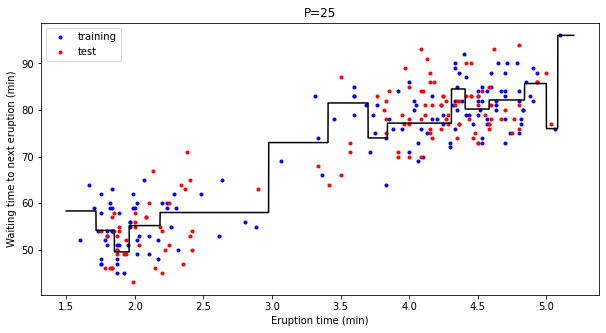

In [5]:
#Drawing training data points and test data points
P=25
minval=1.5
maxval=5.2
node_splits,node_means,is_terminal = tree(x_train,y_train,P)
predtest = [predict(x,node_splits,node_means,is_terminal) for x in x_test]
predtest= np.array(predtest)
predtrain = [predict(x,node_splits,node_means,is_terminal) for x in x_train]
predtrain= np.array(predtrain)
data_interval = np.arange(minval,maxval,0.001)
fig = plt.figure(figsize=(10,5))
plt.plot(x_train,y_train,"b.", alpha = 1, label="training")
plt.plot(x_test,y_test,"r.", alpha = 1, label="test")
int_plot=[]
for i in range(len(data_interval)):
    int_plot.append(predict(data_interval[i],node_splits,node_means,is_terminal))
plt.plot(data_interval,int_plot,color="black")
plt.xlabel("Eruption time (min)")
plt.ylabel("Waiting time to next eruption (min)")
plt.title("P=25")
plt.legend(loc="upper left")
plt.show()

In [6]:
# RMSE calculation for testing and training, Printing 

def rmse_Test(y_test,predtest):
    return np.sqrt(sum((y_test - predtest) ** 2) / len(y_test))

def rmse_Train(y_train,predtrain):
    return np.sqrt(sum((y_train - predtrain) ** 2) / len(y_train))

print("RMSE on training set is",rmse_Train(y_train,predtrain),"when P is",  P)
print("RMSE on testing set is",rmse_Test(y_test,predtest),"when P is",  P)

RMSE on training set is 4.541214189194451 when P is 25
RMSE on testing set is 6.454083413352087 when P is 25


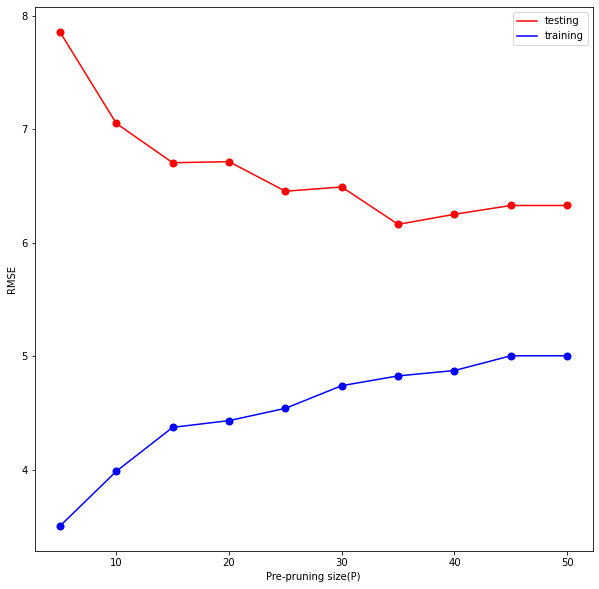

In [7]:
#Drawing RMSE for training and test data points as a function of P.

rmse_values_test = []
rmse_values_train = []

for P in range(5,55,5):
    node_splits,node_means,is_terminal = tree(x_train,y_train,P)
    predtest = np.array([predict(x,node_splits,node_means,is_terminal) for x in x_test])
    rmse_values_test.append(rmse_Test(y_test,predtest))
    node_splits,node_means,is_terminal = tree(x_train,y_train,P)
    predtrain = np.array([predict(x,node_splits,node_means,is_terminal) for x in x_train])
    rmse_values_train.append(rmse_Train(y_train,predtrain))
rmses_test = np.array(rmse_values_test)
rmses_train = np.array(rmse_values_train)
fig = plt.figure(figsize=(10,10))
plt.plot(range(5,55,5),rmse_values_test,color= "red", label="testing")
plt.scatter(range(5,55,5),rmse_values_test,color= "red",linewidths=2) 
plt.plot(range(5,55,5),rmse_values_train,color= "blue", label="training")
plt.scatter(range(5,55,5),rmse_values_train,color= "blue",linewidths=2) 
plt.xlabel("Pre-pruning size(P)")
plt.ylabel("RMSE")
plt.legend(loc="upper right")
plt.show()